## Prediction of the Following Month Forward Price Using LSTM Models

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Get the directory of the current script
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()

from build_a_pipeline import build_pipeline_P0_foward_price
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

In [2]:
import os
import random
import numpy as np
import tensorflow as tf

seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

In [3]:
from build_a_pipeline import build_pipeline_P0_foward_price
model_performance = []
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = 'P1')
datetime_index = x_val.index
#x_val = x_val.sort_index(ascending=True)
#y_val = y_val.sort_index(ascending=True)
# Convert x_train and x_val to NumPy arrays
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
# Reshape x_train and x_val to have the required 3D shape
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])  # [samples, time_steps=1, features]
x_val = x_val.reshape(x_val.shape[0], 1, x_val.shape[1])    
model_performance = [] 

LSTM Input Layer
- Added TimeDistributed Layer with selu activation function

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(100, activation='selu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'Model': 'LSTM - 200 input',
    'LayerExtra': 'TimeDistributed, Dense, Relu',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 32433.3711 - root_mean_squared_error: 178.6748 - val_loss: 33135.9609 - val_root_mean_squared_error: 182.0329
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 18233.3984 - root_mean_squared_error: 132.8637 - val_loss: 15831.5068 - val_root_mean_squared_error: 125.8233
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9331.8193 - root_mean_squared_error: 95.1147 - val_loss: 5360.6450 - val_root_mean_squared_error: 73.2164
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 3964.1548 - root_mean_squared_error: 61.6011 - val_loss: 1578.3339 - val_root_mean_squared_error: 39.7282
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1771.2051 - root_mean_squared_error: 41.7676 - val_loss: 1547.0824 - val_root_mean_squared_error: 39.3330
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1334.3000 - root_mean_squared_error: 36.2728 - val_loss: 1249.5634 - val_root_mean_squared_error: 35.3

LSTM Input Layer
- Added TimeDistributed Layer with relu activation function

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(100, activation='relu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'Model': 'LSTM - 200 input',
    'LayerExtra': 'TimeDistributed, Dense, Selu',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 33250.6406 - root_mean_squared_error: 181.1078 - val_loss: 38730.7109 - val_root_mean_squared_error: 196.8012
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 21896.1250 - root_mean_squared_error: 145.9835 - val_loss: 21708.3477 - val_root_mean_squared_error: 147.3375
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 13121.8018 - root_mean_squared_error: 113.4728 - val_loss: 14855.9492 - val_root_mean_squared_error: 121.8850
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8309.7197 - root_mean_squared_error: 89.3854 - val_loss: 5299.6978 - val_root_mean_squared_error: 72.7990
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3791.0420 - root_mean_squared_error: 60.0487 - val_loss: 1441.3568 - val_root_mean_squared_error: 37.9652
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 1840.1615 - root_mean_squared_error: 42.2927 - val_loss: 1371.7091 - val_root_mean_squared_error: 37.0366
Epoc

LSTM
- Multivariate Layer
- Selu function
- Added Dropout

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(150, activation='relu')), 
    Dropout(0.2),
    TimeDistributed(Dense(100, activation='selu')), 
    Dropout(0.2),
    TimeDistributed(Dense(50, activation='relu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'Model': 'LSTM - 200 input',
    'LayerExtra': 'TimeDistributed, Dense, Relu Dropout',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 205ms/step - loss: 28836.1484 - root_mean_squared_error: 167.0970 - val_loss: 9463.5703 - val_root_mean_squared_error: 97.2809
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 5812.4951 - root_mean_squared_error: 74.8877 - val_loss: 1691.6825 - val_root_mean_squared_error: 41.1301
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - loss: 2027.9130 - root_mean_squared_error: 44.8231 - val_loss: 1283.1936 - val_root_mean_squared_error: 35.8217
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 1788.5568 - root_mean_squared_error: 42.1451 - val_loss: 1250.4446 - val_root_mean_squared_error: 35.3616
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 1699.5690 - root_mean_squared_error: 41.0674 - val_loss: 1399.5482 - val_root_mean_squared_error: 37.4105
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 1915.4371 - root_mean_squared_error: 43.6759 - val_loss: 1537.2195 - val_root_mean_squared_error: 39.2074

More layers or neurons does not seem to improve the performance

## Back to the Best Performing One

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(200, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(100, activation='selu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'Model': 'Best So Far',
    'LayerExtra': 'TimeDistributed, Dense, Relu',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120


18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 328ms/step - loss: 32166.3594 - root_mean_squared_error: 177.8606 - val_loss: 30386.4199 - val_root_mean_squared_error: 174.3170
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 16351.9209 - root_mean_squared_error: 125.7290 - val_loss: 13460.2061 - val_root_mean_squared_error: 116.0181
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 7747.7046 - root_mean_squared_error: 86.4442 - val_loss: 3414.7705 - val_root_mean_squared_error: 58.4360
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 3096.6736 - root_mean_squared_error: 54.7850 - val_loss: 1451.2206 - val_root_mean_squared_error: 38.0949
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 1590.4432 - root_mean_squared_error: 39.6632 - val_loss: 1456.4872 - val_root_mean_squared_error: 38.1640
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 1313.0586 - root_mean_squared_error: 35.9607 - val_loss: 1210.5856 - val_root_mean_squared_error: 34.7935
Epoch

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(195, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(95, activation='selu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'Model': 'LSTM - 200 input',
    'LayerExtra': 'TimeDistributed, Dropout',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 32275.5996 - root_mean_squared_error: 178.1950 - val_loss: 32019.2949 - val_root_mean_squared_error: 178.9394
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 17401.8535 - root_mean_squared_error: 129.7703 - val_loss: 15036.2920 - val_root_mean_squared_error: 122.6226
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 8702.4639 - root_mean_squared_error: 91.7473 - val_loss: 4417.1235 - val_root_mean_squared_error: 66.4614
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3557.3752 - root_mean_squared_error: 58.4671 - val_loss: 1495.6702 - val_root_mean_squared_error: 38.6739
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 1720.7371 - root_mean_squared_error: 41.1347 - val_loss: 1310.8708 - val_root_mean_squared_error: 36.2060
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1261.8333 - root_mean_squared_error: 35.2428 - val_loss: 1121.0797 - val_root_mean_squared_error: 33.4

That one is pretty good, but I will try something here

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.1),
    TimeDistributed(Dense(111, activation='selu')), 
    LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    Dropout(0.1),
    LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(111, activation='selu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'Model': 'LSTM - 200 input',
    'LayerExtra': 'TimeDistributed, Dropout',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - loss: 32811.6523 - root_mean_squared_error: 179.7724 - val_loss: 34581.0195 - val_root_mean_squared_error: 185.9597
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19878.5312 - root_mean_squared_error: 139.3734 - val_loss: 27305.9922 - val_root_mean_squared_error: 165.2453
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17248.0527 - root_mean_squared_error: 130.4967 - val_loss: 28489.7461 - val_root_mean_squared_error: 168.7891
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17431.8535 - root_mean_squared_error: 130.9751 - val_loss: 28161.0957 - val_root_mean_squared_error: 167.8127
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17349.1914 - root_mean_squared_error: 130.7162 - val_loss: 28111.2246 - val_root_mean_squared_error: 167.6640
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17312.5156 - root_mean_squared_error: 130.5770 - val_loss: 28187.7441 - val_root_mean_squared

Conclusion, adding more layers does not seem to add better performance

In [10]:
from tensorflow.keras.models import load_model
best_model = load_model('multivariate_lstm.keras')
y_pred = best_model.predict(x_val)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 288ms/step


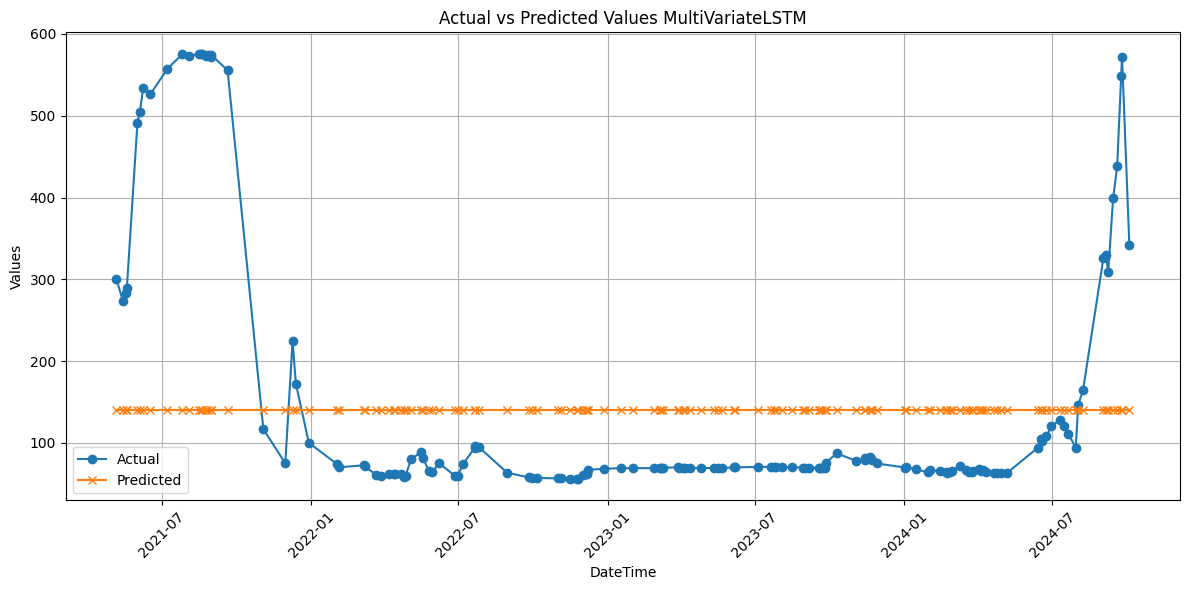

In [11]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

y_pred = y_pred.flatten()
predictions_df = pd.DataFrame(y_pred, index=datetime_index, columns=['Predicted'])
predictions_df = predictions_df.sort_index()
y_val = y_val.sort_index()

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(y_val.index, y_val, label='Actual', marker='o')
plt.plot(y_val.index, predictions_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values MultiVariateLSTM')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [12]:
performance_df = pd.DataFrame(model_performance)
performance_df_sorted = performance_df.sort_values(by='Validation RMSE', ascending=True)
performance_df_sorted

,Model,LayerExtra,Train RMSE,Validation RMSE
3,Best So Far,"TimeDistributed, Dense, Relu",10.964216,19.340809
4,LSTM - 200 input,"TimeDistributed, Dropout",9.978686,19.573156
0,LSTM - 200 input,"TimeDistributed, Dense, Relu",11.360278,20.255789
1,LSTM - 200 input,"TimeDistributed, Dense, Selu",9.552195,20.457691
2,LSTM - 200 input,"TimeDistributed, Dense, Relu Dropout",46.823586,73.447952
5,LSTM - 200 input,"TimeDistributed, Dropout",122.726692,167.833221
